In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 12})

### Define the model

#### SIR

In [4]:
def sir_model(t, x, beta=1., gamma=.26):
    return np.array([-beta*x[1]*x[0]/(np.sum(x)),
                     beta*x[1]*x[0]/(np.sum(x)) - gamma*x[1],
                     gamma*x[1]]
                    )

#### SIS

In [23]:
def sis_model(t,x, beta=1., gamma=0.26):
    return np.array([-beta*x[1]*x[0]/(np.sum(x)) + gamma*x[1],
                     beta*x[1]*x[0]/(np.sum(x)) - gamma*x[1]
                    ])

**Universal solver**

Produces the plots as shown in the talk.

In [24]:
def solve_n_plot(model, x0, beta, gamma, t0, te, delta_t, b=None, savetitle=None):
    sol = solve_ivp(lambda t, y: model(t, y, beta, gamma), (t0,tend), x0, t_eval=np.linspace(t0,tend,(tend-t0)/delta_t), dense_output=True)

    t = sol['t']
    y = sol['y']

    colors = {'S':'darkblue', 'I':'red', 'R':'green'}

    plt.figure(figsize=(12,7))
    for i, key in zip(range(y.shape[0]), colors.keys()):
        plt.plot(t, y[i], c=colors[key], label=key, lw=3.)
    plt.legend()
    plt.grid()
    if b is not None:
        plt.title('{} model dynamics: b = {}'.format(model.__name__[:3].upper(), np.round(b,2)), fontsize=20)
    else:
        plt.title('{} model dynamics'.format(model.__name__[:3].upper()), fontsize=20)
    plt.xlabel('Iteration', fontsize=20)
    plt.ylabel('Affected respective population', fontsize=20)
    if savetitle is not None:
        plt.savefig(savetitle)
    

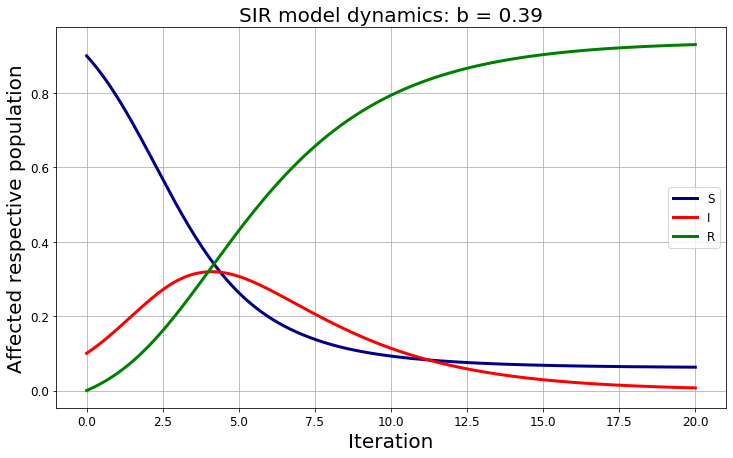

In [25]:
x0 = [0.9, 0.1, 0.]
t0 = 0
tend = 20
delta_t = 0.01

beta = 1.
gamma = .35 # mu bei Simone

b = gamma/(x0[0]*beta)

solve_n_plot(sir_model, x0, beta, gamma, t0, tend, delta_t, b=b, savetitle='sir_b_{:.2f}.png'.format(b))

#### SIS

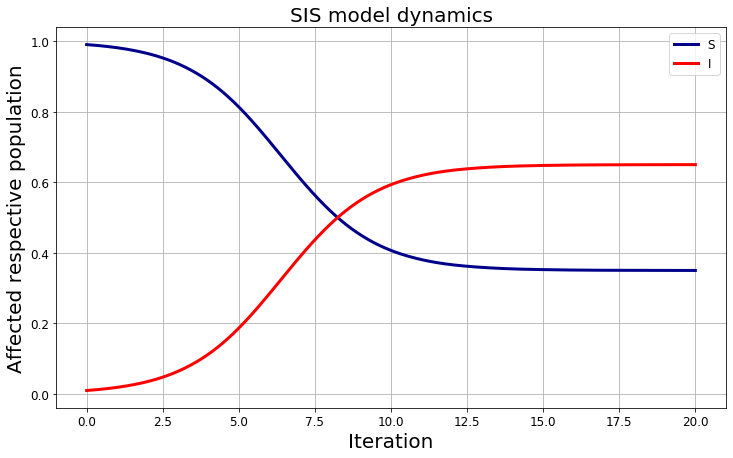

In [26]:
x0 = [0.99, 0.01]  # 2D model
solve_n_plot(sis_model, x0, beta, gamma, t0, tend, delta_t, savetitle='sis_b_{:.2f}.png'.format(b))

## Interactive Part

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve_n_plot_sir(beta, gamma,t0, te, s0):
    delta_t=0.01
    x0 = [s0, 1-s0, 0]
    sol = solve_ivp(lambda t, y: sir_model(t, y, beta, gamma), (t0,te), x0, t_eval=np.linspace(t0,te,(te-t0)/delta_t), dense_output=True)
    
    t = sol['t']
    y = sol['y']

    colors = {'Susceptible':'darkblue', 'Infected':'darkred', 'Recovered':'darkgreen'}
    # use latex for font rendering
    #plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(12,7))
    for i, key in zip(range(y.shape[0]), colors.keys()):
        plt.plot(t, y[i], c=colors[key], label=key)
    plt.legend()
    plt.grid()
    plt.title('SIR model dynamics')
    plt.xlabel('Iteration')
    plt.ylabel('Affected respective population')

In [6]:
from ipywidgets import interactive
from IPython.display import clear_output, display, HTML
from matplotlib import animation

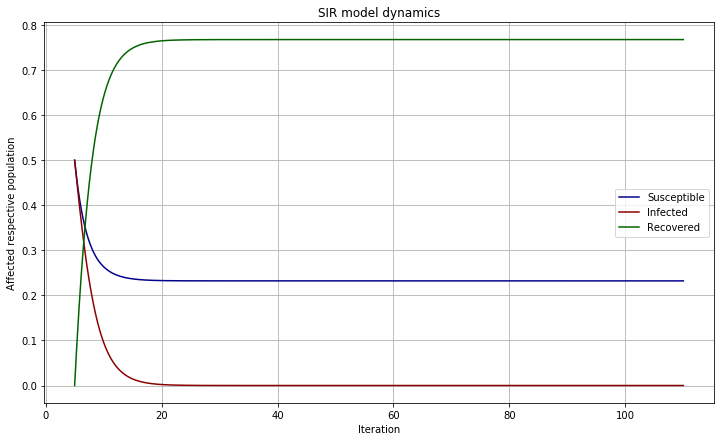

In [7]:
ww = interactive(solve_n_plot_sir, beta=(0.,1.), gamma=(0.,1.), t0=(0, 10), te=(20,200), s0=(0.,1.))
display(ww)